## Extract Audio signal and plot from audacity

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MultipleLocator
import numpy as np
import scipy
from scipy import signal
from scipy.io import wavfile
import wave
import sys

In [6]:
file = wave.open('music.wav', 'r') #change file name
print(file)

In [7]:
#Extract raw signal from wav file
signal = file.readframes(-1)
signal = np.fromstring(signal, 'Int16')
fs = file.getframerate()
print(fs)

44100


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


Input file name: MusicAudio


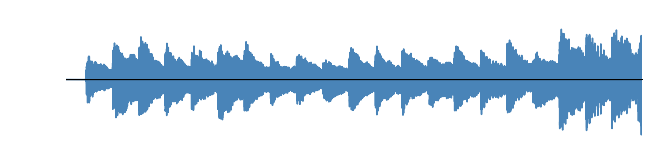

In [8]:
#Needs to be mono file. If stereo, can specify either (should be the same) using the following code: [:,0] to get the first index
if file.getnchannels() == 1:
    print('Just mono files')
    sys.exit(0)

plt.figure(1)
ax1 = plt.axes([-5, 2, 1, 1])

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
plt.rc('ytick', labelsize=13)

#plot
# color scheme for each stimuli: background - #929591; music - #4984b8; speech - #e50000
figure = plt.plot(signal, '#4984b8')

#set axis limit
ax1.set_xlim(-50,500000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.axis('off') 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
#print(fig_size)

# Set figure width to 8 and height to 2
fig_size[0] = 8
fig_size[1] = 2
plt.rcParams["figure.figsize"] = fig_size
plt.axhline(y=0, color = 'black', linewidth = '0.3')
plt.axhline(y = 155, xmin=0, clip_on = False, color = 'black', linewidth = '1')
#ax1.axvline(linewidth=4, color='black')  


#save figure - uncomment to save
plt.savefig(input("Input file name: "), bbox_inches='tight') 

# Create spectrogram from .wav file

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:7585: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(0.0, 10.0, 0.0, 10000.0)

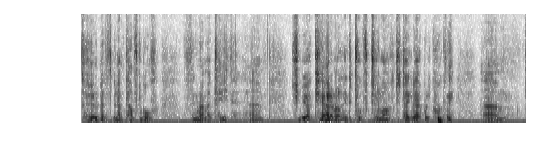

In [41]:
#BACKGROUND NOISE
rate, frames = wavfile.read('speech.wav') #change file name 
#frames[10*rate,0] # gives you the first 10 seconds of data (# samples = sec * sample/sec)

fig, ax = plt.subplots();
vmin = -40

#set x and y axis
ymin = 0;
ymax = 10000;
xmin = 0;
xmax = 10;
pxx, freq, t, cax = ax.specgram(frames[:, 0], # first channel
                                Fs=rate,      # to get frequency axis in Hz
                                cmap='Greys', vmin=vmin);

#cbar = fig.colorbar(cax)
#ax.axis("tight")
ax.set_ylim([ymin,ymax])
ax.set_xlim([xmin,xmax])
plt.axis('off')              #change back to on if numbers are needed

#save fig
#plt.savefig('background.png', bbox_inches='tight', dpi=300, frameon='false')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


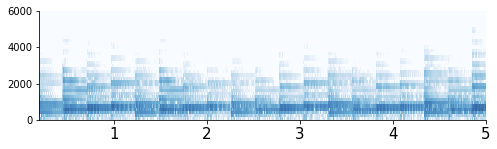

In [80]:
#MUSIC
rate, frames = wavfile.read("music.wav") #change file name 
fig, ax = plt.subplots();
vmin = 1.043

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#set x and y axis
ymin = 0;
ymax = 6000;
xmin = 0.2;
xmax = 5;

#plt.figure(figsize=(16,4))
pxx, freq, t, cax = ax.specgram(frames[:, 0], # first channel
                                Fs=rate,      # to get frequency axis in Hz
                                cmap='Blues', vmin=vmin, NFFT=256, alpha=0.8);

#cbar = fig.colorbar(cax)
ax.axis("tight")
ax.set_ylim([ymin,ymax])
ax.set_xlim([xmin,xmax])
plt.axis('on')              #change back to on if numbers are needed
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=15)
ax1.axvline(linewidth=4, color='black')  


#save fig
plt.savefig('music.png', bbox_inches='tight', dpi=300, frameon='false')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:7585: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


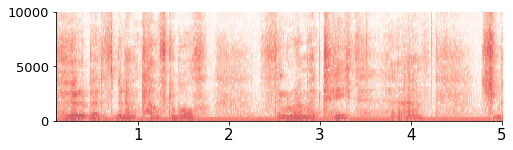

In [88]:
#SPEECH 
rate, frames = wavfile.read("speech.wav") #change file name 
fig, ax = plt.subplots();
vmin = -20

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#set x and y axis
ymin = 0;
ymax = 10000;
xmin = 0.1;
xmax = 5;
pxx, freq, t, cax = ax.specgram(frames[:, 0], # first channel
                                Fs=rate,      # to get frequency axis in Hz
                                cmap='Reds', vmin=vmin, alpha=0.65);

#cbar = fig.colorbar(cax)
ax.axis("tight")
ax.set_ylim([ymin,ymax])
ax.set_xlim([xmin,xmax])
plt.axis('on')              #change back to on if numbers are needed
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=15)
ax1.axvline(linewidth=4, color='black')  

#save fig
plt.savefig('speech.png', bbox_inches='tight', dpi=300, frameon='false')

# Overlay Audio (wav files) Mixtures

In [11]:
# Load all wav files for each stimuli. Note these are all stereo NOT mono! 
samplerate_speech, data_speech = wavfile.read("speech.wav")
samplerate_music, data_music = wavfile.read("music.wav")
#samplerate_backrd, data_backrd = wavfile.read("background_noise.wav")
# This is all stereo NOT mono! 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [12]:
# Take one part of the array to create mono 
sample_speech = data_speech.shape[0]
sample_music = data_music.shape[0]
sample_backrd = data_backrd.shape[0]

NameError: name 'data_backrd' is not defined

NameError: name 'data_speech' is not defined

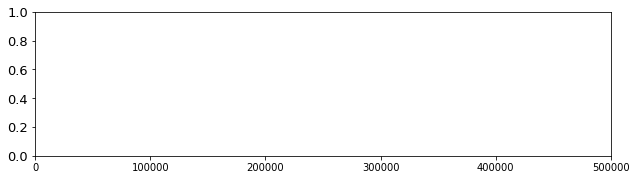

In [9]:
plt.figure(2)
ax2 = plt.axes([-5, 2, 1, 1])
ax2.set_xlim(-50,500000)

#plot each wav file and correspond with color above  
# color scheme for each stimuli: background - #929591; music - #4984b8; speech - #e50000
Speech = plt.plot(data_speech[:,0], '#e50000', label='Speech', alpha=0.75)
Music = plt.plot(data_music[:,0], '#4984b8', label='Music', alpha=0.8)
#Background_Noise = plt.plot(data_backrd[:,0], '#4984b8', label='Background Noise', alpha=0.8)

plt.axis('off')

ax2.legend(loc='center left', bbox_to_anchor=(1, 0.92))
fig1 = plt.gcf()
plt.show()
plt.draw()

#save plot: UNCOMMENT TO SAVE
plt.savefig('soundMix.pdf', format='PDF', bbox_inches='tight')
plt.show()

